# Generate DKFZ Dataset GeneExp Match File

*DKFZ_Preprocessing.ipynb* notebook is offering detailed step-by-step instructions on how to prepare DKFZ Matched GeneExp file from orignial DKFZ data files.
Then *GenerateDKFZ_Dataset.ipynb* notebook is offering for the next step.
1. Load RNA-seq and clinical data from the original data files.
2. Combine patients' gene expression data with their clinical records to create a comprehensive file.
3. Convert gene IDs/symbols used in CPTAC-3 and DKFZ datasets to those used by in the TCGA TCGA data and update the data files.

Required input files:
1. prostate_dkfz_2018.tar # Downloaded DKFZ original file at https://miami.box.com/s/bxmo9z61br9cy3rndqvf3uj0jtgd0e28
2. gene_dict_sample_new.csv # Gene IDs and Symbols mapping dictionary 1 at https://miami.box.com/s/bqoya8d6zr1ku7h6giawaupe4l9aixhw
3. gene_dict_symbol_new.csv # Gene IDs and Symbols mapping dictionary 2 at https://miami.box.com/s/ve3st08ha4u6868hzq3o8remmo7iw1or
4. PRAD_gen_header.csv # TCGA PRAD Gene Exp header ID list at https://miami.box.com/s/m5et6rvbkiunmsqjm6pxy6lhob3ggorq

Output files:
1. CPTAC-3&DKFZ/prostate_dkfz_2018_converted.txt #DKFZ matched gene exp dataset

In [1]:
import pandas as pd
import tarfile

# Open the tar file
tar = tarfile.open('CPTAC-3&DKFZ/prostate_dkfz_2018.tar')

# Extract all files to a specific directory
tar.extractall(path='CPTAC-3&DKFZ/prostate_dkfz_2018/')

# Close the tar file
tar.close()

In [2]:
DKFZ_df = pd.read_csv('CPTAC-3&DKFZ/prostate_dkfz_2018/data_mrna_seq_rpkm.txt', sep='\t')
DKFZ_df.drop('Entrez_Gene_Id', axis=1, inplace=True)
DKFZ_df.set_index(DKFZ_df.columns[0], inplace=True)
DKFZ_df = DKFZ_df.T
DKFZ_df

Hugo_Symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC026461.2,AC011472.2,AL844908.1,AC079075.1,AC124312.2,AC136619.1,AC104389.2,NHLRC4,AL773572.1,AC016590.1
ICGC_PCA198_T01,18.875262,0.108218,35.180677,4.255928,1.787963,1.544083,2.723745,29.796938,7.716018,13.523081,...,7.473775,0.935701,0.613399,0.000000,0.000000,0.0,0.0,1.375252,0.000000,0.007759
ICGC_PCA196_T01,16.533706,0.013649,43.296050,4.434412,0.949567,1.570493,3.346303,34.256102,7.780315,14.341822,...,4.439204,0.983782,0.907319,0.000000,0.000000,0.0,0.0,0.697932,0.300551,0.008179
ICGC_PCA192_T01,10.278598,0.026287,27.185924,4.361717,0.639421,1.301035,3.650926,20.375828,6.919426,8.319599,...,2.306947,0.777564,1.525703,0.000000,0.000000,0.0,0.0,1.129248,0.000000,0.006126
ICGC_PCA187_T01,38.823790,0.376956,30.782953,4.587687,0.592373,0.746833,1.962123,37.211522,6.955372,6.846182,...,25.731396,1.571466,1.628104,0.000000,0.000000,0.0,0.0,2.140168,0.000000,0.017737
ICGC_PCA184_T01,35.605941,0.113122,27.443339,4.813432,0.723745,1.967128,1.676372,37.728622,4.614072,8.634961,...,24.252179,1.873242,1.976835,0.000000,0.000000,0.0,0.0,1.424885,0.003758,0.029656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_PCA005_T01,14.859889,0.040356,10.217075,4.709072,0.514350,1.095187,1.869936,23.462580,4.095117,12.261634,...,13.713274,0.695781,1.763863,0.000000,0.000000,0.0,0.0,0.864258,0.085802,0.070532
ICGC_PCA004_T01,8.447638,0.053626,11.638121,5.424208,0.548955,0.921201,7.161141,25.278450,4.396990,8.135403,...,2.417467,0.693424,1.326197,0.000000,0.082620,0.0,0.0,0.479884,0.065559,0.198694
ICGC_PCA003_T01,8.736858,0.134422,8.875532,3.160511,0.478393,1.083103,2.890258,16.193568,4.754148,7.547658,...,4.559855,0.418277,0.635258,0.000000,0.094136,0.0,0.0,0.607526,0.932087,0.158045
ICGC_PCA002_T01,9.327628,0.032836,8.555576,4.226749,0.532492,1.930236,2.264625,14.741400,4.957857,13.566883,...,9.495230,0.777040,0.740241,0.000000,0.000000,0.0,0.0,0.652982,0.069814,0.107126


In [3]:
DKFZ_column = DKFZ_df.columns.values.tolist()
DKFZ_column

['TSPAN6',
 'TNMD',
 'DPM1',
 'SCYL3',
 'C1orf112',
 'FGR',
 'CFH',
 'FUCA2',
 'GCLC',
 'NFYA',
 'C1orf201',
 'NIPAL3',
 'LAS1L',
 'ENPP4',
 'SEMA3F',
 'CFTR',
 'ANKIB1',
 'CYP51A1',
 'KRIT1',
 'RAD52',
 'BAD',
 'LAP3',
 'CD99',
 'HS3ST1',
 'ABP1',
 'WNT16',
 'HECW1',
 'MAD1L1',
 'LASP1',
 'SNX11',
 'TMEM176A',
 'M6PR',
 'KLHL13',
 'CYP26B1',
 'ICA1',
 'DBNDD1',
 'ALS2',
 'CASP10',
 'CFLAR',
 'TFPI',
 'C2orf56',
 'RBM5',
 'MTMR7',
 'SLC7A2',
 'ARF5',
 'SARM1',
 'PLXND1',
 'AK2',
 'CD38',
 'FKBP4',
 'KDM1A',
 'RBM6',
 'CAMKK1',
 'RECQL',
 'CCDC132',
 'HSPB6',
 'ARHGAP33',
 'NDUFAB1',
 'PDK4',
 'SLC22A16',
 'ZMYND10',
 'ABCB5',
 'ARX',
 'SLC25A13',
 'ST7',
 'CDC27',
 'SLC4A1',
 'CALCR',
 'HCCS',
 'DVL2',
 'PRSS22',
 'UPF1',
 'SKAP2',
 'SLC25A5',
 'CCDC109B',
 'HOXA11',
 'POLR2J',
 'DHX33',
 'MEOX1',
 'THSD7A',
 'LIG3',
 'RPAP3',
 'ACSM3',
 'AC004381.6',
 'CIAPIN1',
 'AC004410.1',
 'KIAA1539',
 'COPZ2',
 'PRKAR2B',
 'MSL3',
 'CREBBP',
 'BZRAP1',
 'MPO',
 'PON1',
 'C2orf3',
 'WDR54',
 'CRO

In [4]:
def remove_none_values(dictionary):
    # Create a new dictionary without None values
    new_dict = {str(key): value for key, value in dictionary.items() if not isinstance(value, float)}
    return new_dict
def remove_none_values_gene(dictionary):
    # Create a new dictionary without None values
    new_dict = {str(key): str(int(value)) for key, value in dictionary.items() if value > 0}
    return new_dict

def get_value_from_dict(dictionary, key):
    # Get the value from the dictionary if the key exists
    if key in dictionary:
        return dictionary[key]

    # Return the original value if the key is not in the dictionary
    return key

header_df = pd.read_csv('CPTAC-3&DKFZ/PRAD_gen_header.csv')
gen_header_get = header_df.values.tolist()
df_convert = pd.DataFrame(columns=gen_header_get)

df_new_sample = pd.read_csv('CPTAC-3&DKFZ/gene_dict_sample_new.csv')
symbol_dict = df_new_sample.set_index('GeneID')['OfficialSymbol'].to_dict()
new_symbol_dict = remove_none_values(symbol_dict)

# Read the mapping DataFrame from CSV
mapping_df = pd.read_csv('CPTAC-3&DKFZ/gene_dict_symbol_new.csv')

# Create a dictionary mapping from the mapping DataFrame using '_id' as the key and 'MappedValue' as the value
mapping_dict = mapping_df.set_index('_id')['symbol'].to_dict()

count_pos = 0
count_nag = 0
id_miss = []
id_get = []
for column_name, column_data in df_convert.iteritems():
    try:
        column_name_get = str(column_name)[2: -3]
        # print(column_name_get)
        id = str(column_name_get.split('|')[1])
        new_id = mapping_dict[str(id)]
        #print(id, new_id)
        value = DKFZ_df[new_id]
        # print(column_name_get, value)
        df_convert[column_name] = value
        id_get.append(new_id)
        count_pos += 1
    except:
        try:
            id = str(column_name_get.split('|')[0])
            value = DKFZ_df[id]
            df_convert[column_name] = value
            id_get.append(id)
            count_pos += 1
        except:
            try:
                id = str(column_name_get.split('|')[1])
                new_id = get_value_from_dict(new_symbol_dict, id)
                value = DKFZ_df[new_id]
                df_convert[column_name] = value
                id_get.append(id)
                count_pos += 1
            except:
                id_miss.append(column_name_get)
                # print(column_name_get, 'None')
                df_convert[column_name] = None
                count_nag += 1
df_convert.gen_id = 'PRAD'
df_convert

,bar,PFI,PFItime,gen_id,type,?|100133144,?|10357,?|10431,?|155060,?|26823,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
ICGC_PCA198_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,30.186657,None,None,...,6.923315,21.582012,1.427626,3.551453,2.410733,4.907148,7.493623,38.762346,2.235283,6.103063
ICGC_PCA196_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,20.781363,None,None,...,9.489437,5.539151,1.400698,3.768381,1.891544,2.400883,6.260822,40.297573,1.250914,5.547623
ICGC_PCA192_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,14.012165,None,None,...,3.599968,4.036992,1.692921,3.092681,3.948183,1.454601,6.886100,28.368410,2.576761,6.063853
ICGC_PCA187_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,19.895289,None,None,...,2.990770,2.765634,1.935469,4.041836,1.990928,0.548249,6.431129,26.571751,3.357384,5.128143
ICGC_PCA184_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,20.567598,None,None,...,3.628763,3.001283,1.589094,3.592727,1.961094,0.750531,4.427128,30.653946,3.209377,5.026754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_PCA005_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,7.600698,None,None,...,1.625334,0.740449,1.310961,2.643662,5.316592,0.611810,4.819813,43.841390,8.164817,2.468972
ICGC_PCA004_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,9.780776,None,None,...,2.278294,1.637447,1.163010,2.229661,6.174050,1.147742,6.293188,39.581143,7.017233,5.860986
ICGC_PCA003_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,7.636465,None,None,...,1.824603,1.298947,1.075595,2.221146,5.621287,1.471187,5.418815,55.138897,8.568954,4.161830
ICGC_PCA002_T01,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,6.921291,None,None,...,1.913815,1.274605,1.327418,3.363149,7.578699,0.656983,5.614364,52.193349,9.349462,4.307724


In [5]:
DKFZ_cli_df = pd.read_csv('CPTAC-3&DKFZ/prostate_dkfz_2018/prostate_dkfz_2018_clinical_data.tsv', sep='\t', on_bad_lines='skip')
DKFZ_cli_df['bar'] = DKFZ_cli_df['Sample ID']
DKFZ_cli_df.set_index('Sample ID', inplace=True)
DKFZ_cli_df

,Study ID,Patient ID,Diagnosis Age,Age Group at Diagnosis in Years,BCR Status,Cancer Type,Cancer Type Detailed,Clonality,ETS Status,Radical Prostatectomy Gleason Score for Prostate Cancer,...,Preop PSA,Sample Class,Number of Samples Per Patient,Sex,Somatic Status,Source,Stage,Time from Surgery to BCR/Last Follow Up,TMB (nonsynonymous),bar
Sample ID,,,,,,,,,,,,,,,,,,,,,
ICGC_PCA001_T01,prostate_dkfz_2018,ICGC_PCA001,45,EO,1.0,"Prostate Cancer, NOS",Prostate,monoclonal,1,3+4,...,30.00,Tumor,1,Male,Matched,ICGC,pT3a,27.2,2.100000,ICGC_PCA001_T01
ICGC_PCA002_T01,prostate_dkfz_2018,ICGC_PCA002,51,EO,NaN,"Prostate Cancer, NOS",Prostate,monoclonal,1,3+4,...,23.80,Tumor,1,Male,Matched,ICGC,pT2c,NaN,0.833333,ICGC_PCA002_T01
ICGC_PCA003_T01,prostate_dkfz_2018,ICGC_PCA003,46,EO,1.0,"Prostate Cancer, NOS",Prostate,NaN,1,5+4,...,11.96,Tumor,1,Male,Matched,ICGC,pT3a,7.7,2.033333,ICGC_PCA003_T01
ICGC_PCA004_T01,prostate_dkfz_2018,ICGC_PCA004,51,EO,1.0,"Prostate Cancer, NOS",Prostate,polyclonal,1,4+3,...,107.00,Tumor,1,Male,Matched,ICGC,pT3b,0.5,0.633333,ICGC_PCA004_T01
ICGC_PCA005_T01,prostate_dkfz_2018,ICGC_PCA005,50,EO,NaN,"Prostate Cancer, NOS",Prostate,polyclonal,1,3+4,...,5.13,Tumor,1,Male,Matched,ICGC,pT3a,NaN,0.366667,ICGC_PCA005_T01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_PCA184_T01,prostate_dkfz_2018,ICGC_PCA184,51,EO,0.0,"Prostate Cancer, NOS",Prostate,monoclonal,1,3+4,...,8.40,Tumor,1,Male,Matched,ICGC,pT2c,30.5,0.433333,ICGC_PCA184_T01
ICGC_PCA187_T01,prostate_dkfz_2018,ICGC_PCA187,46,EO,0.0,"Prostate Cancer, NOS",Prostate,monoclonal,1,3+3,...,5.40,Tumor,1,Male,Matched,ICGC,pT2c,22.8,0.366667,ICGC_PCA187_T01
ICGC_PCA192_T01,prostate_dkfz_2018,ICGC_PCA192,52,EO,1.0,"Prostate Cancer, NOS",Prostate,NaN,1,4+4,...,348.40,Tumor,1,Male,Matched,ICGC,pT3b,2.1,1.233333,ICGC_PCA192_T01


In [6]:
df_convert.PFItime = DKFZ_cli_df['Time from Surgery to BCR/Last Follow Up'].astype(float) * 30
df_convert.PFI = DKFZ_cli_df['BCR Status']
df_convert.bar = DKFZ_cli_df['bar']
df_convert.to_csv('CPTAC-3&DKFZ/prostate_dkfz_2018_converted.txt', index_label=False)
df_convert

,bar,PFI,PFItime,gen_id,type,?|100133144,?|10357,?|10431,?|155060,?|26823,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
ICGC_PCA198_T01,ICGC_PCA198_T01,0.0,1413.0,PRAD,NaN,NaN,NaN,30.186657,None,None,...,6.923315,21.582012,1.427626,3.551453,2.410733,4.907148,7.493623,38.762346,2.235283,6.103063
ICGC_PCA196_T01,ICGC_PCA196_T01,NaN,NaN,PRAD,NaN,NaN,NaN,20.781363,None,None,...,9.489437,5.539151,1.400698,3.768381,1.891544,2.400883,6.260822,40.297573,1.250914,5.547623
ICGC_PCA192_T01,ICGC_PCA192_T01,1.0,63.0,PRAD,NaN,NaN,NaN,14.012165,None,None,...,3.599968,4.036992,1.692921,3.092681,3.948183,1.454601,6.886100,28.368410,2.576761,6.063853
ICGC_PCA187_T01,ICGC_PCA187_T01,0.0,684.0,PRAD,NaN,NaN,NaN,19.895289,None,None,...,2.990770,2.765634,1.935469,4.041836,1.990928,0.548249,6.431129,26.571751,3.357384,5.128143
ICGC_PCA184_T01,ICGC_PCA184_T01,0.0,915.0,PRAD,NaN,NaN,NaN,20.567598,None,None,...,3.628763,3.001283,1.589094,3.592727,1.961094,0.750531,4.427128,30.653946,3.209377,5.026754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_PCA005_T01,ICGC_PCA005_T01,NaN,NaN,PRAD,NaN,NaN,NaN,7.600698,None,None,...,1.625334,0.740449,1.310961,2.643662,5.316592,0.611810,4.819813,43.841390,8.164817,2.468972
ICGC_PCA004_T01,ICGC_PCA004_T01,1.0,15.0,PRAD,NaN,NaN,NaN,9.780776,None,None,...,2.278294,1.637447,1.163010,2.229661,6.174050,1.147742,6.293188,39.581143,7.017233,5.860986
ICGC_PCA003_T01,ICGC_PCA003_T01,1.0,231.0,PRAD,NaN,NaN,NaN,7.636465,None,None,...,1.824603,1.298947,1.075595,2.221146,5.621287,1.471187,5.418815,55.138897,8.568954,4.161830
ICGC_PCA002_T01,ICGC_PCA002_T01,NaN,NaN,PRAD,NaN,NaN,NaN,6.921291,None,None,...,1.913815,1.274605,1.327418,3.363149,7.578699,0.656983,5.614364,52.193349,9.349462,4.307724


In [7]:
print(count_pos, count_nag)
id_miss

14961 1179


['bar',
 'PFI',
 'PFItime',
 'gen_id',
 'type',
 '?|100133144',
 '?|10357',
 '?|155060',
 '?|26823',
 '?|390284',
 '?|645851',
 '?|653553',
 '?|728788',
 '?|90288',
 'ABCC6P2|730013',
 'ABO|28',
 'ADAM6|8755',
 'ADAM8|101',
 'ADH1C|126',
 'AFARP1|246182',
 'AFG3L1|172',
 'AGAP11|119385',
 'ALDH3B1|221',
 'ALG9|79796',
 'ALMS1P|200420',
 'ALOX12P2|245',
 'AMZ2P1|201283',
 'ANKHD1-EIF4EBP3|404734',
 'ANKRD19|138649',
 'ANKRD20B|729171',
 'ANKRD36B|57730',
 'ANXA2P1|303',
 'ANXA2P2|304',
 'ARGFXP2|503640',
 'ARPM1|84517',
 'ATG9B|285973',
 'ATP8B5P|158381',
 'AURKAPS1|6791',
 'BAGE2|85319',
 'BAIAP2L1|55971',
 'BCL8|606',
 'BDNFOS|497258',
 'BMS1P4|729096',
 'BMS1P5|399761',
 'BPESC1|60467',
 'BTN2A3|54718',
 'C10orf110|55853',
 'C10orf41|100131213',
 'C10orf75|90271',
 'C10orf78|119392',
 'C10orf79|80217',
 'C12orf47|51275',
 'C12orf75|387882',
 'C14orf139|79686',
 'C14orf19|280655',
 'C14orf33|100129075',
 'C15orf21|283651',
 'C15orf28|80035',
 'C15orf50|414926',
 'C15orf51|196968',
 'C

In [8]:
# Specify the file path and name
file_path = 'CPTAC-3&DKFZ/DKFZ_miss.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each element of the list to a new line in the file
    for item in id_miss:
        file.write(str(item) + '\n')

print('List saved to', file_path)

List saved to CPTAC3/Validation/DKFZ_miss.txt


In [9]:
import pandas as pd
GetDF = pd.read_csv('./CPTAC-3&DKFZ/TotalData_PRAD.txt')
variances = GetDF.iloc[:, 5:].var()
variances_sorted = variances.sort_values(ascending=False)
variances_sorted

TGM4|7047           16.948510
CRISP3|10321        14.569375
NPY|4852            14.537718
MYH7|4625           14.090592
GSTM1|2944          13.547365
                      ...    
SPATA3|130560        0.030728
CIAO1|9391           0.029185
LOC144742|144742     0.019598
DCD|117159           0.017374
PRNT|149830          0.008811
Length: 16135, dtype: float64

In [10]:
# Extract column names
column_names = GetDF.columns

# Create a new DataFrame with column names
column_names_df = pd.DataFrame({'Column Names': column_names}).T

# Save the DataFrame to a CSV file
column_names_df.to_csv('./CPTAC-3&DKFZ/PRAD_gen_header.csv', index=False)
column_names_df

,0,1,2,3,4,5,6,7,8,9,...,16130,16131,16132,16133,16134,16135,16136,16137,16138,16139
Column Names,bar,PFI,PFItime,gen_id,type,?|100133144,?|10357,?|10431,?|155060,?|26823,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009


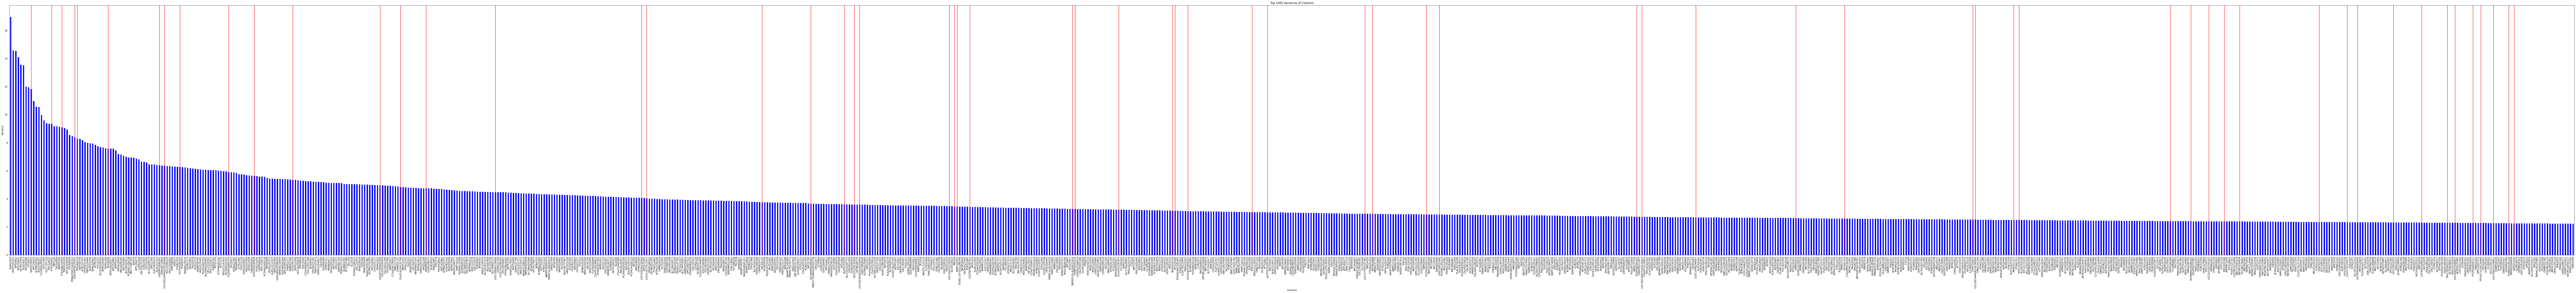

In [11]:
import matplotlib.pyplot as plt

def sort_list_based_on_rank(a, b):
    sorted_a = sorted(a, key=lambda x: b.index(x))
    return sorted_a

variances_sorted = variances.sort_values(ascending=False).head(1000)

plt.figure(figsize=(200, 20))

# Plot all columns as blue
variances_sorted.plot(kind='bar', color='blue')

dataset = 'DKFZ'

file_path = "CPTAC-3&DKFZ/{}_miss.txt".format(dataset)  # Replace with the actual file path

# Read the text file
with open(file_path, 'r') as file:
    TCGA_miss = file.read().splitlines()

imp_list = []
# Mark columns in TCGA_miss list as red
for col in TCGA_miss:
    if col in variances_sorted.index:
        plt.axvline(x=variances_sorted.index.get_loc(col), color='red')
        imp_list.append(col)

plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Top 1000 Variances of Columns')

plt.show()

# Specify the file path and name
file_path = 'CPTAC-3&DKFZ/{}_miss_imp.txt'.format(dataset)

sorted_imp_list = sort_list_based_on_rank(imp_list, variances_sorted.index.tolist())

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each element of the list to a new line in the file
    for item in sorted_imp_list:
        file.write(str(item) + '\n')

Norm by VCP, RAB7A, GPI: 38.12376439497399, without log all: 21419.06700584365, without log risk: 21633.678655542713
Norm by all 10: 117.54838057590766, without log all: 43416.288172294895, without log risk: 43753.68415198343

'CPTAC3/Validation/GSE54460/Matched_GSE54460_GeneExp_FPKM.csv': 3 genes 61218.833885163636; all genes: 131726.18713920002
'CPTAC3/Validation/prostate_dkfz_2018/Matched_DKFZ_GeneExp_FPKM.csv': 3 genes 757193.2278522917 ; all genes: 2142440.9625751544
